##### An outlier is a data point that is significantly different from other observations in a dataset. 
##### It may be too high or too low compared to the general trend.

##### Why Remove Outliers?
##### They distort statistical analysis (mean, variance, correlation).
##### They affect machine learning models (e.g., linear regression, clustering).
##### They can be genuine anomalies (fraudulent transactions, sensor errors) or important rare cases (high-value customers).

## Z-Score (Standard Deviation Method)
##### The Z-score measures how far a data point is from the mean in terms of standard deviation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(10)

,cgpa,placement_exam_marks,placed
243,6.78,55.0,0
482,7.56,8.0,0
675,6.10,20.0,0
975,8.43,25.0,1
875,5.73,16.0,1
649,7.60,65.0,1
192,6.67,38.0,0
852,6.54,43.0,1
414,7.30,36.0,1
355,6.42,18.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

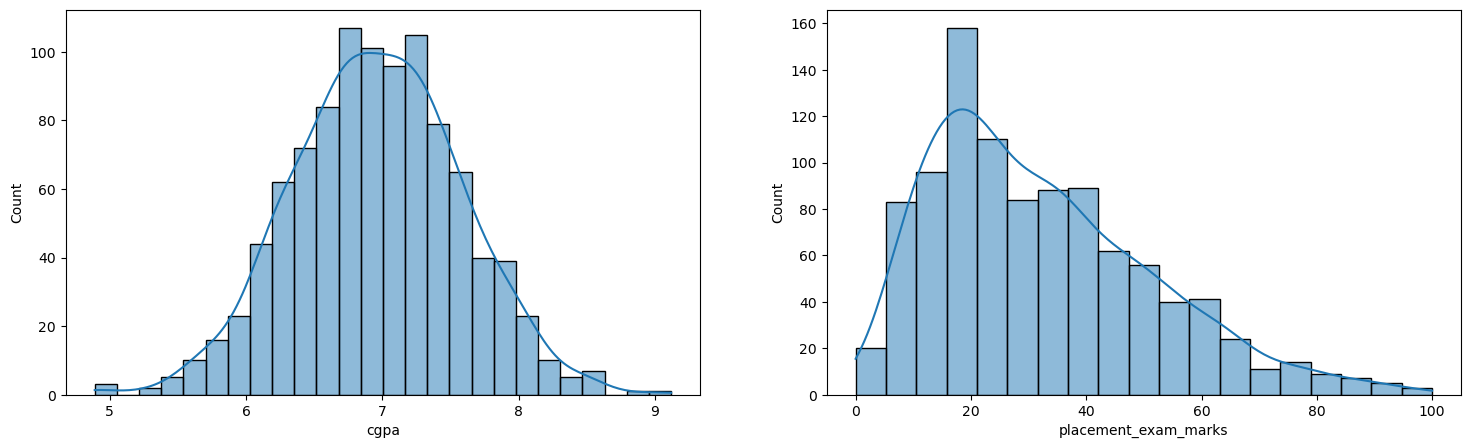

In [8]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

In [9]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [10]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [11]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [12]:
# finding outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#### Trimming

In [13]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [14]:
#Calculating Z Score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.sample(5)

,cgpa,placement_exam_marks,placed,cgpa_zscore
822,7.33,32.0,1,0.598736
969,6.86,41.0,0,-0.164378
93,7.00,30.0,0,0.062933
348,6.13,17.0,1,-1.349639
698,7.27,16.0,0,0.501317


In [15]:
#detecting outlier
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
#trimming data in new df
new_df = df[(df['cgpa_zscore'] < 3) | (df['cgpa_zscore'] > -3)]

In [17]:
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


#### Capping

In [18]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [19]:
lower_limit

5.113546374602832

In [20]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [21]:
df.shape

(1000, 4)

In [22]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


## IQR (Interquartile Range) Method
##### The Interquartile Range (IQR) identifies outliers by measuring the middle 50% of the data.
##### If a value is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, it is an outlier.

In [23]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

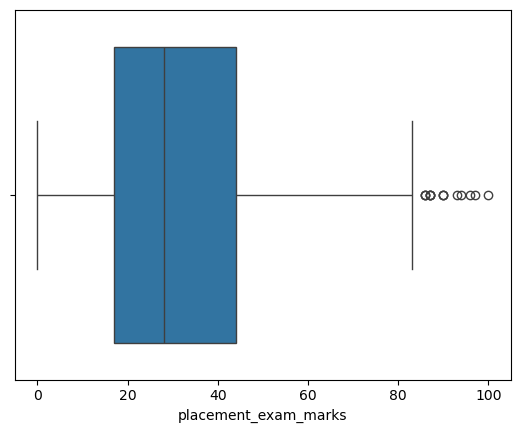

In [25]:
sns.boxplot(x = df['placement_exam_marks'])

In [26]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [27]:
percentile75

44.0

In [28]:
iqr = percentile75 - percentile25

In [29]:
iqr

27.0

In [30]:
#finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [31]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding Outliers

In [34]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [35]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


### Trimming

In [36]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [37]:
new

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


Text(0.5, 1.0, 'New data box plot')

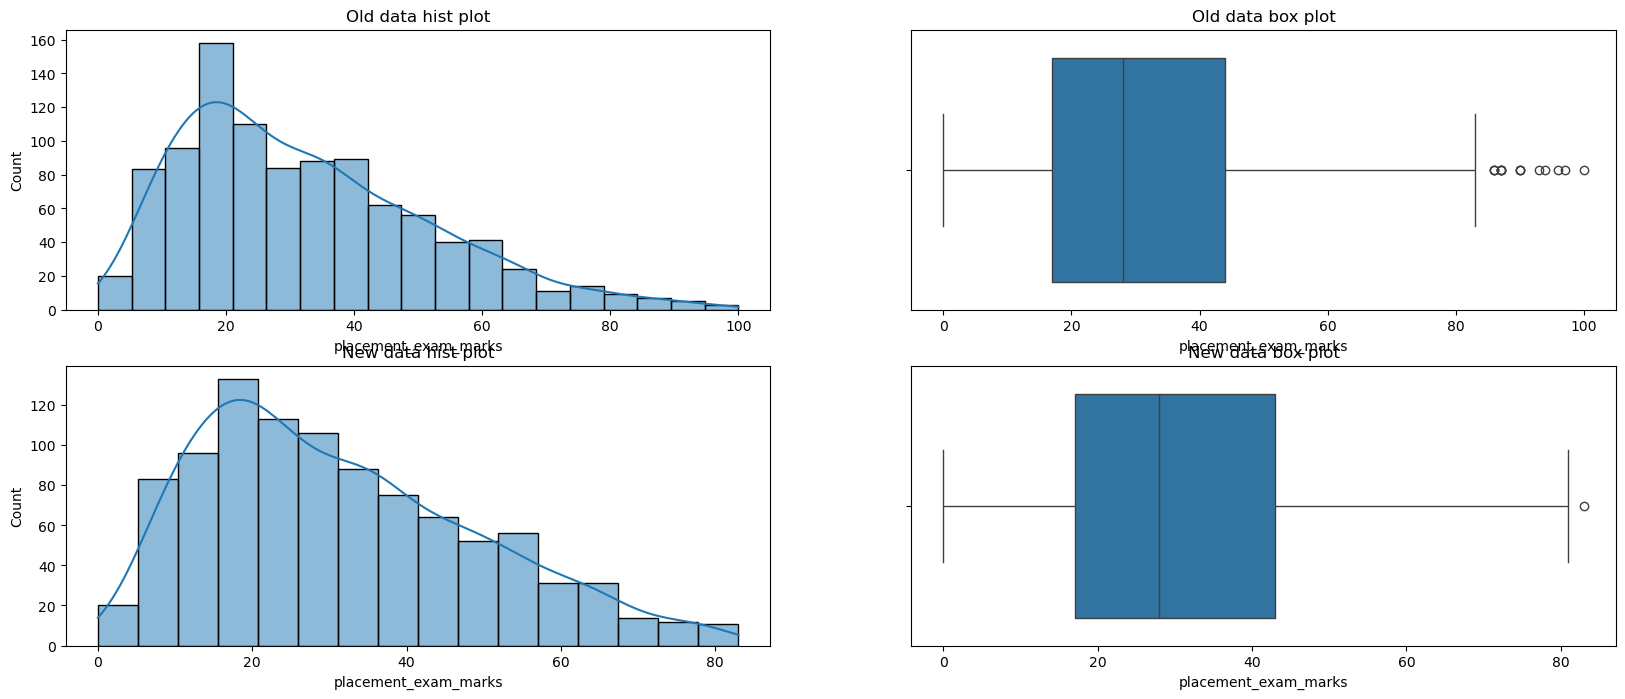

In [51]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("Old data hist plot")

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])
plt.title("Old data box plot")

plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'], kde=True)
plt.title("New data hist plot")

plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])
plt.title("New data box plot")

## Percentile Method for Outlier Removal
##### The percentile method removes extreme values by setting a lower and upper threshold based on a chosen percentile.

### How Does It Work?
##### Data below the lower percentile (e.g., 1st percentile) is considered an outlier.
##### Data above the upper percentile (e.g., 99th percentile) is considered an outlier.
### When to Use?
##### Best for skewed data (e.g., salaries, house prices).
##### Avoids assuming normality, unlike the Z-score method.
##### Works well when you don’t want to use IQR but still remove extreme values.

In [52]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [53]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

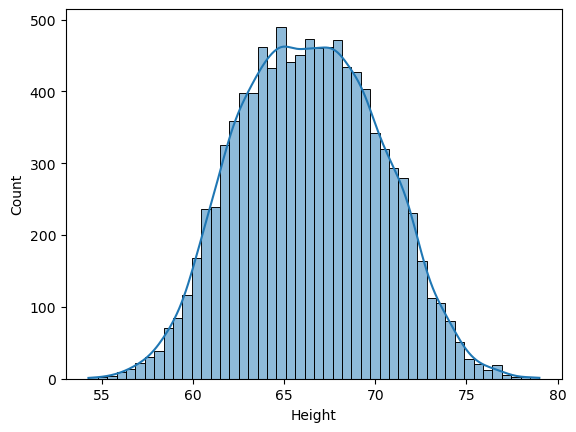

In [55]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

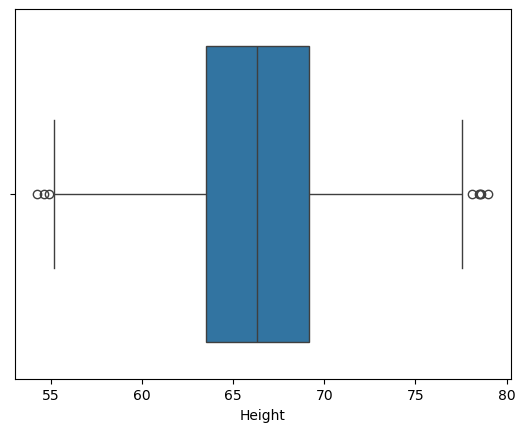

In [56]:
sns.boxplot(x=df['Height'])

In [57]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [58]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [62]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [63]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

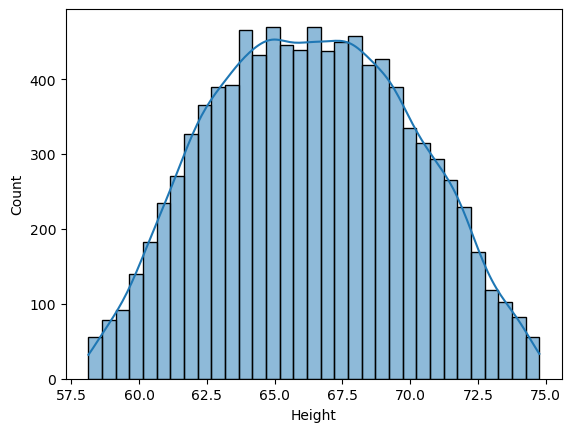

In [65]:
sns.histplot(new_df['Height'], kde=True)

<Axes: xlabel='Height'>

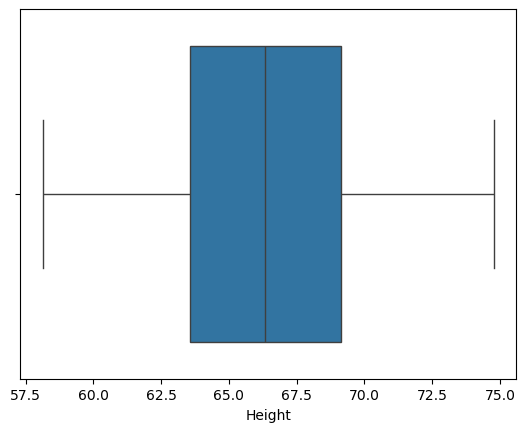

In [67]:
sns.boxplot(x = new_df['Height'])

#### Capping

In [68]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [69]:
df.shape

(10000, 3)

<Axes: xlabel='Height', ylabel='Count'>

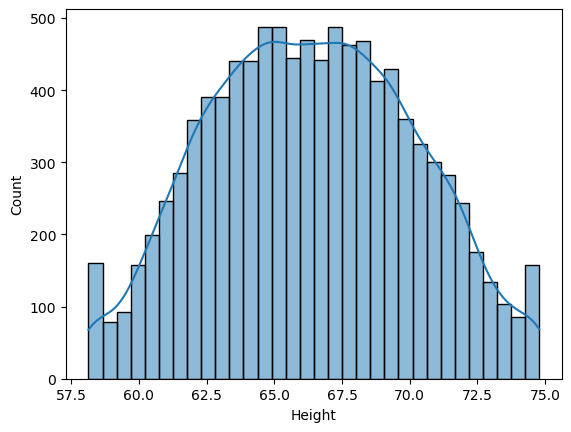

In [70]:
sns.histplot(df['Height'], kde=True)

<Axes: xlabel='Height'>

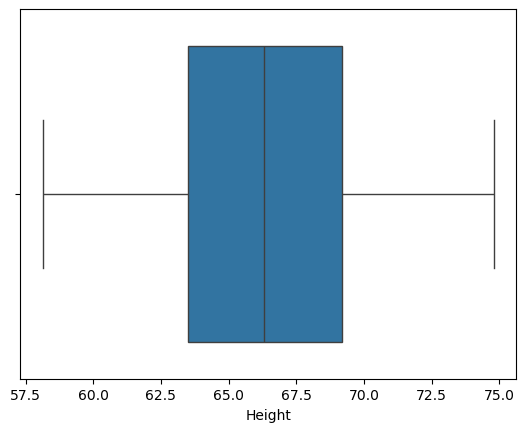

In [71]:
sns.boxplot(x = df['Height'])